#### Name: Andrew Shapiro
#### Date: 10/16/2024
#### Exercise: Project #1, Part 3: Data Analysis and Visualization
#### Description: This notebook will read in the cleaned Fall 2024 Non-Majors survey data and perform analysis to answer 4 data science questions to help the chairperson of CCM's Department of Information Technologies.

In [484]:
import pandas as pd

In [485]:
%matplotlib inline
import matplotlib.pyplot as plt

In [486]:
import numpy as np

In [487]:
import seaborn as sns

## Import the cleaned data from Assignment #2.
For the previous assignment, I have selected the **Fall 2024** dataset of the **Non-Majors Survey Results**. 
* The cleaned .csv file is called `CleanedFall2024.csv`.

In [488]:
# Read the dataset into the pandas data frame.
df = pd.read_csv('CleanedFall2024.csv')

### **(1) Instructor Q.** Which computing areas had the highest interest for those students interested in taking more computing classes?
* For this question, I will need to check out which computing areas had the highest interest for students who are interested in taking more computing classes.
* Since I need to reference parts of the data that involve computing area interest, I will need to use all of the columns that had the `interest` tag I added in Part 2 of this Project. 
* I will also need to use the `more_courses` column as that will be how we figure out which students are interested in taking more computing classes.

In [489]:
# Filter to be the columns that had the interest tag, as those contain the data related to student interest.
columns = df.filter(like='interest').columns
columns

Index(['interest_web_development', 'interest_cybersecurity',
       'interest_app_development', 'interest_data_analytics', 'interest_ml_ai',
       'interest_computer_programming', 'interest_game_design',
       'interest_hardware_repair'],
      dtype='object')

Looking at the output, there are 8 different computing areas that are in the data. We will be plotting those 8 data columns and showing the corresponding count of students who are interested in that computing area.

For the next part of the data, we will need to go ahead and go filter through the `more_courses` column and return the rows that were interested in taking more computing classes. For this analysis, I have made it so that people who put a 3, 4, or 5 are part of this analysis. I will analyze 4s and 5s later to see if there is a difference!

I also got rid of the other columns that I didn't need for this data analysis.

In [490]:
# The .loc() function allows us to return columns that fit a filter. 
# I checked if 3, 4, or 5 are in each row and returned a new dataframe that contains only those rows!
interested_more_courses = df.loc[df['more_courses'].isin([3, 4, 5])]

# Get rid of columns that are not needed.
interested_more_courses = interested_more_courses[list(columns) + ['more_courses',]]

interested_more_courses

,interest_web_development,interest_cybersecurity,interest_app_development,interest_data_analytics,interest_ml_ai,interest_computer_programming,interest_game_design,interest_hardware_repair,more_courses
1,No,Yes,Yes,Yes,Yes,Yes,No,No,3
2,Yes,No,Yes,No,Yes,Yes,Yes,Yes,5
3,No,No,No,Yes,No,No,Yes,No,3
4,No,No,No,No,No,No,No,No,3
5,Yes,No,Yes,No,No,No,Yes,No,3
6,No,No,No,No,No,No,Yes,No,3
7,No,No,No,No,No,No,No,No,3
18,Yes,No,Yes,No,Yes,Yes,Yes,Yes,4
20,No,No,No,No,No,No,No,No,3
23,No,Yes,No,No,No,No,No,No,3


In [491]:
# Finding out the new size of the data frame.
interested_more_courses.shape

(48, 9)

We created a new dataframe with people who are interested in more computing classes. This has now shortened our data table to be from 92 total entries to be 48 entries. These 48 entries are all students who have selected 3, 4, or 5 as being interested in more computing classes. We have also removed all columns but the `interest_` and the `more_courses` one.

Now, we need to go through each of the 8 computing areas and count how many are interested in each computing area. I did this by going through the 8 columns that we stored in a list called `columns` and counting how many 'Yes's are present in each column. Then, I appended this value to a new list `count` which will store the count of people interested in each computing area.

In [492]:
# This empty list 'count' will store the count of people interested in each computing area.
count = []

# Going through each column and counting how many people put 'Yes' and appending it to count.
for c in columns:
    count.append((interested_more_courses[c] == 'Yes').sum())

count

[np.int64(16),
 np.int64(26),
 np.int64(20),
 np.int64(15),
 np.int64(22),
 np.int64(18),
 np.int64(22),
 np.int64(18)]

We now have a list of numbers that show how many people are interested in each computing area. This list was made with the dataframe of students who put 3, 4, or 5 as their interest in taking more computing classes.

To keep the column names cleaner and easier to read when graphing, I have went ahead and used the string .replace() function to delete the 'interest_' tag that were in front of the columns that we needed to reference.

In [493]:
# Replace 'interest_' with '' to delete them from each column name.
columns = columns.str.replace('interest_', '', regex=False)
columns

Index(['web_development', 'cybersecurity', 'app_development', 'data_analytics',
       'ml_ai', 'computer_programming', 'game_design', 'hardware_repair'],
      dtype='object')

I personally find using the names from the columns good for the chart above. However, for others, renaming each one to the full name would be better. I will now rename the columns array to make them look better.

In [494]:
new_names = {
    'web_development': 'Web Development',
    'cybersecurity': 'Cybersecurity',
    'app_development': 'App Development',
    'data_analytics': 'Data Analytics',
    'ml_ai': 'Machine Learning/AI',
    'computer_programming': 'Computer Programming',
    'game_design': 'Game Design',
    'hardware_repair': 'Hardware Repair'
}

# Rename the columns with the dictionary above.
columns = [new_names.get(c, c) for c in columns]
columns

['Web Development',
 'Cybersecurity',
 'App Development',
 'Data Analytics',
 'Machine Learning/AI',
 'Computer Programming',
 'Game Design',
 'Hardware Repair']

When I first ran the code above and graphed it with the graphing code at the bottom, I wasn't appealed to it. I didn't like how it wasn't sorted and how everything was blue. I wanted to make it easier to see so I added a sort and color system to the graph.

I used **ChatGPT** to help me out with the sorting code snippet below.

In [495]:
# Sort indexes by their argument.
sorted_indices = np.argsort(count)
# Sort the count data by the new sorted index array.
sorted_count = np.array(count)[sorted_indices]
# Sort the column name data by the new sorted index array.
sorted_columns = np.array(columns)[sorted_indices]

# OpenAI. ChatGPT. 2024. OpenAI, https://www.openai.com/chatgpt.

I was not able to find how you created the color thing in any of your slideshow materials so I used list comprehensions to make my own version. I did this by finding the highest value in the count list, then, go through the entire list and check if the value is equal to the top value I found earlier. If it is, it would make that color green in the color list and if it is not, it would make it gray.

This would become the `colors` list that we will use for creating our graph to make it colorful and easier for us to see.

In [496]:
# Find the highest count value.
top = np.argsort(sorted_count)[-1:]
# Form a color list with list comprehension and set each color depending on if it is equal to the highest count value.
colors = ['green' if i in top else '#E5E5E5' for i in range(len(count))]

colors

['#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 'green']

To display the data, I used a horizontal bar chart. This is the best choice as it will display each computing area on the y axis and show the count on the x axis. I thought about doing a vertical bar graph, but I feel like it would look weird and the text labels may crowd in the bottom. This is why I did a horizontal bar chart.

I used the `sorted_columns` for the column data. This is the list of columns with the `interest_` flag removed and sorted using the algorithm earlier.
I used the `sorted_Count` for the count data. This is the list of counts that only contain those interested in computing areas (3, 4, or 5 in interested in taking more computing classes at CCM) and sorted using the algorithm earlier.

I added color from the `colors` array as well. This show display the top option in green and the others in gray.

I also added a title, x axis label, and y axis label to inform us on what the graph is about and which piece of data is each axis referencing.

Text(0, 0.5, 'Computing Areas')

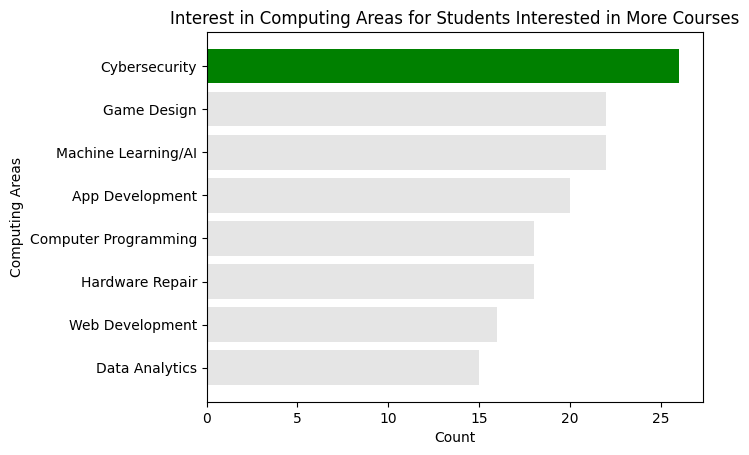

In [497]:
# Create the horizontal bar chart with the data and add the colors attribute.
plt.barh(sorted_columns,sorted_count, color=colors)

# Add a title, x-axis label, and y-axis label to inform us of what the graph is about and what pieces of data are being referenced.
plt.title("Interest in Computing Areas for Students Interested in More Courses")
plt.xlabel("Count")
plt.ylabel("Computing Areas")

In this first data analysis, we can see that from students who stated that they were either a 3, 4, or 5 for interested in taking more computing classes, the top choice for their most interested topic was Cybersecurity, with over 25 students. Following Cybersecurity comes Game Design and Machine Learning/AI. The Department of Information Technologies could this piece of information to have more Cybersecurity, Game Design, and Machine Learning classes available for those students in future semesters. The Department of Information Technologies could also the other end of the chart: Data Analytics and Web Development, which they could possibly not have as many slots open for them. Of course, this decision would also need to be made with other things in mind, such as current class enrollment, but this could be a hint for them to start investigating into the success in those programs.

However, I was not sure about how confident these results are, so I decided to run the program again but instead only do 4s & 5s, and a third time of only 5s to see if there is a trend between the most interested topics.

Text(0, 0.5, 'Computing Areas')

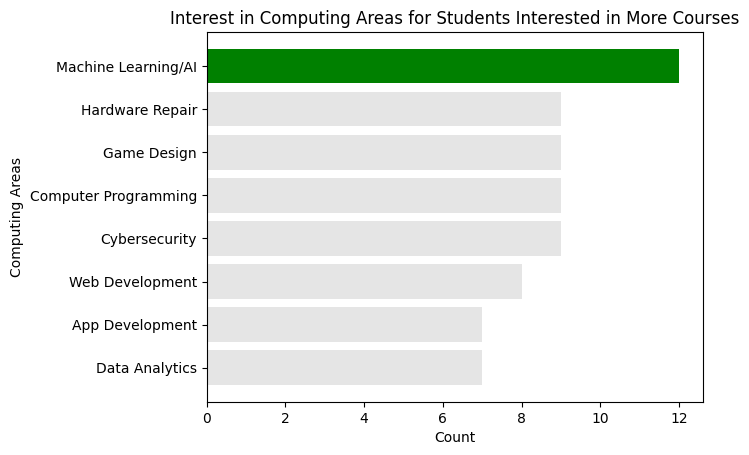

In [498]:
# Filter to be the columns that had the interest tag, as those contain the data related to student interest.
columns = df.filter(like='interest').columns

# The .loc() function allows us to return columns that fit a filter. 
# I checked if 4 or 5 are in each row and returned a new dataframe that contains only those rows!
interested_more_courses = df.loc[df['more_courses'].isin([4, 5])]

# Get rid of columns that are not needed.
interested_more_courses = interested_more_courses[list(columns) + ['more_courses',]]

# This empty list 'count' will store the count of people interested in each computing area.
count = []

# Going through each column and counting how many people put 'Yes' and appending it to count.
for c in columns:
    count.append((interested_more_courses[c] == 'Yes').sum())

# Replace 'interest_' with '' to delete them from each column name.
columns = columns.str.replace('interest_', '', regex=False)

new_names = {
    'web_development': 'Web Development',
    'cybersecurity': 'Cybersecurity',
    'app_development': 'App Development',
    'data_analytics': 'Data Analytics',
    'ml_ai': 'Machine Learning/AI',
    'computer_programming': 'Computer Programming',
    'game_design': 'Game Design',
    'hardware_repair': 'Hardware Repair'
}

# Rename the columns with the dictionary above.
columns = [new_names.get(c, c) for c in columns]

# Sort indexes by their argument.
sorted_indices = np.argsort(count)
# Sort the count data by the new sorted index array.
sorted_count = np.array(count)[sorted_indices]
# Sort the column name data by the new sorted index array.
sorted_columns = np.array(columns)[sorted_indices]

# OpenAI. ChatGPT. 2024. OpenAI, https://www.openai.com/chatgpt.

# Find the highest count value.
top = np.argsort(sorted_count)[-1:]
# Form a color list with list comprehension and set each color depending on if it is equal to the highest count value.
colors = ['green' if i in top else '#E5E5E5' for i in range(len(count))]

# Create the horizontal bar chart with the data and add the colors attribute.
plt.barh(sorted_columns,sorted_count, color=colors)

# Add a title, x-axis label, and y-axis label to inform us of what the graph is about and what pieces of data are being referenced.
plt.title("Interest in Computing Areas for Students Interested in More Courses")
plt.xlabel("Count")
plt.ylabel("Computing Areas")

With just 4s and 5s, the top end of the data is very similar, but with now Machine Learning/AI taking the lead (compared to its tied for #2 spot in the old graph) and Game Design and Cybersecurity tied for second, along with Hardware Repair and Computer Programming. At the bottom, Data Analytics is still at the bottom tied with App Development, while Web Development is 1 vote ahead of both of them.

I will now do it again with only 5s.

Text(0, 0.5, 'Computing Areas')

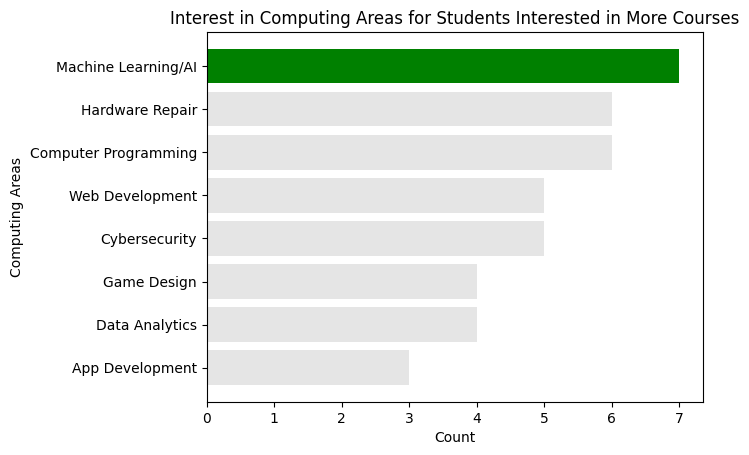

In [499]:
# Filter to be the columns that had the interest tag, as those contain the data related to student interest.
columns = df.filter(like='interest').columns

# The .loc() function allows us to return columns that fit a filter. 
# I checked if 4 or 5 are in each row and returned a new dataframe that contains only those rows!
interested_more_courses = df.loc[df['more_courses'].isin([5,])]

# Get rid of columns that are not needed.
interested_more_courses = interested_more_courses[list(columns) + ['more_courses',]]

# This empty list 'count' will store the count of people interested in each computing area.
count = []

# Going through each column and counting how many people put 'Yes' and appending it to count.
for c in columns:
    count.append((interested_more_courses[c] == 'Yes').sum())

# Replace 'interest_' with '' to delete them from each column name.
columns = columns.str.replace('interest_', '', regex=False)

new_names = {
    'web_development': 'Web Development',
    'cybersecurity': 'Cybersecurity',
    'app_development': 'App Development',
    'data_analytics': 'Data Analytics',
    'ml_ai': 'Machine Learning/AI',
    'computer_programming': 'Computer Programming',
    'game_design': 'Game Design',
    'hardware_repair': 'Hardware Repair'
}

# Rename the columns with the dictionary above.
columns = [new_names.get(c, c) for c in columns]

# Sort indexes by their argument.
sorted_indices = np.argsort(count)
# Sort the count data by the new sorted index array.
sorted_count = np.array(count)[sorted_indices]
# Sort the column name data by the new sorted index array.
sorted_columns = np.array(columns)[sorted_indices]

# OpenAI. ChatGPT. 2024. OpenAI, https://www.openai.com/chatgpt.

# Find the highest count value.
top = np.argsort(sorted_count)[-1:]
# Form a color list with list comprehension and set each color depending on if it is equal to the highest count value.
colors = ['green' if i in top else '#E5E5E5' for i in range(len(count))]

# Create the horizontal bar chart with the data and add the colors attribute.
plt.barh(sorted_columns,sorted_count, color=colors)

# Add a title, x-axis label, and y-axis label to inform us of what the graph is about and what pieces of data are being referenced.
plt.title("Interest in Computing Areas for Students Interested in More Courses")
plt.xlabel("Count")
plt.ylabel("Computing Areas")

This chart surprised me as it now shows Cybersecurity and Game Design closer to the bottom, which were at the top of the chart when we had 3s, 4s, and 5s.

What I learned from this analysis is that Machine Learning/AI is the top for the 4s and 5s, which indicates that they may be more interested in those types of classes. The Department can try to include those classes more and maybe innovate new classes that are directed for those interested in them. Additionally, for Cybersecurity (top of the 3s), it does not mean that there is not a lot of interest, but instead, it is something that people who are unsure if they are interested in taking more classes would be interested in. The Department could use this and try to innovate and make improves to current Cybersecurity programs to make them more interesting to get those unsure enrolled.

### **(2) Student Q.** What sources are most frequent for students to hear about CCM's Computer Science programs?
* For this question, I will need to check out which sources people that filled out the survey heard about CCM's Computer Science programs.
* Since I need to reference parts of the data that involve where people heard about the programs, I will need to use all of the columns that had the `heard` tag I added in Part 2 of this Project. 

In [500]:
# Filter to be the columns that had the heard tag, as those contain the data related to different ways CCM Students may have heard about our CCM Computer Science courses.
columns = df.filter(like='heard').columns
columns

Index(['heard_ccm_website', 'heard_ccm_billboard', 'heard_ccm_tv',
       'heard_ccm_radio', 'heard_ccm_social_media', 'heard_ccm_event',
       'heard_ccm_family_friend', 'heard_ccm_employer',
       'heard_ccm_current_student', 'heard_ccm_alumni', 'heard_ccm_hs'],
      dtype='object')

Looking at the output, there are 11 different options that CCM primarily relies on for people to hear about the programs that are in the data. We will be plotting those 11 data columns and showing the corresponding count of students who heard about the programs from there.

I got rid of the other columns that I didn't need for this data analysis. This is any column that didn't have the `heard` tag. This is to make it easier for me to see the entire table as the output and only focus on the columns that matter.

In [501]:
# Get rid of columns that are not needed.
heard_ccm = df[list(columns)]

heard_ccm

,heard_ccm_website,heard_ccm_billboard,heard_ccm_tv,heard_ccm_radio,heard_ccm_social_media,heard_ccm_event,heard_ccm_family_friend,heard_ccm_employer,heard_ccm_current_student,heard_ccm_alumni,heard_ccm_hs
0,No,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes
1,Yes,No,No,No,Yes,No,Yes,No,Yes,No,No
2,Yes,No,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,Yes,No,Yes,Yes,Yes
4,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
87,No,No,No,No,No,No,Yes,No,No,No,No
88,No,No,No,No,No,No,Yes,No,Yes,Yes,No
89,No,No,No,No,No,Yes,Yes,No,No,No,No
90,Yes,No,No,No,No,Yes,Yes,No,Yes,No,Yes


In [502]:
# Finding out the new size of the data frame.
heard_ccm.shape

(92, 11)

We created a new dataframe with the columns we need. This has now shortened our data table to be from all columns to only include the columns that contained the tag `heard_ccm`.

Now, we need to go through each of the 11 outreach methods and count how many students from the survey heard about the CCM Computer Science programs from them. I did this by going through the 11 columns that we stored in a list called `columns` and counting how many 'Yes's are present in each column. Then, I appended this value to a new list `count` which will store the count of people that heard about CCM's Computer Science programs from each of the 11 sources.

In [503]:
# This empty list 'count' will store the count of people that heard about CCM's Computer Science Programs for each factor.
count = []

# Going through each column and counting how many people put 'Yes' and appending it to count.
for c in columns:
    count.append((df[c] == 'Yes').sum())

count

[np.int64(38),
 np.int64(8),
 np.int64(1),
 np.int64(0),
 np.int64(26),
 np.int64(16),
 np.int64(70),
 np.int64(16),
 np.int64(46),
 np.int64(26),
 np.int64(56)]

We now have a list of numbers that show how many people heard about our computing programs from. 

To keep the column names cleaner and easier to read when graphing, I have went ahead and used the string .replace() function to delete the 'heard_ccm_' tag that were in front of the columns that we needed to reference.

In [504]:
# Replace 'heard_ccm_' with '' to delete them from each column name.
columns = columns.str.replace('heard_ccm_', '', regex=False)
columns

Index(['website', 'billboard', 'tv', 'radio', 'social_media', 'event',
       'family_friend', 'employer', 'current_student', 'alumni', 'hs'],
      dtype='object')

I personally find using the names from the columns good for the chart above. However, for others, renaming each one to the full name would be better. I will now rename the columns array to make them look better.

In [505]:
new_names = {
    'family_friend': 'Family Friend',
    'hs': 'High School',
    'current_student': 'Current Student',
    'website': 'Website',
    'alumni': 'Alumni',
    'social_media': 'Social Media',
    'employer': 'Employer',
    'event': 'Event',
    'billboard': 'Billboard',
    'tv': 'TV',
    'radio': 'Radio'
}

# Rename the columns with the dictionary above.
columns = [new_names.get(c, c) for c in columns]
columns

['Website',
 'Billboard',
 'TV',
 'Radio',
 'Social Media',
 'Event',
 'Family Friend',
 'Employer',
 'Current Student',
 'Alumni',
 'High School']

When I first ran the code above and graphed it with the graphing code at the bottom, I wasn't appealed to it. I didn't like how it wasn't sorted and how everything was blue. I wanted to make it easier to see so I added a sort and color system to the graph.

I used **ChatGPT** to help me out with the sorting code snippet below.

In [506]:
# Sort indexes by their argument.
sorted_indices = np.argsort(count)
# Sort the count data by the new sorted index array.
sorted_count = np.array(count)[sorted_indices]
# Sort the column name data by the new sorted index array.
sorted_columns = np.array(columns)[sorted_indices]

# OpenAI. ChatGPT. 2024. OpenAI, https://www.openai.com/chatgpt.

I was not able to find how you created the color thing in any of your slideshow materials so I used list comprehensions to make my own version. I did this by finding the highest value in the count list, then, go through the entire list and check if the value is equal to the top value I found earlier. If it is, it would make that color green in the color list and if it is not, it would make it gray.

This would become the `colors` list that we will use for creating our graph to make it colorful and easier for us to see.

In [507]:
# Find the highest count value.
top = np.argsort(sorted_count)[-1:]
# Form a color list with list comprehension and set each color depending on if it is equal to the highest count value.
colors = ['green' if i in top else '#E5E5E5' for i in range(len(count))]

colors

['#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 'green']

To display the data, I used a horizontal bar chart. This is the best choice as it will display each outreach source on the y axis and show the count on the x axis. I thought about doing a vertical bar graph, but I feel like it would look weird and the text labels may crowd in the bottom. This is why I did a horizontal bar chart.

I used the `sorted_columns` for the column data. This is the list of columns with the `heard_ccm_` flag removed and sorted using the algorithm earlier.
I used the `sorted_Count` for the count data. This is the list of counts for each of the columns.

I added color from the `colors` array as well. This show display the top option in green and the others in gray.

I also added a title, x axis label, and y axis label to inform us on what the graph is about and which piece of data is each axis referencing.

Text(0, 0.5, 'Outreach Types')

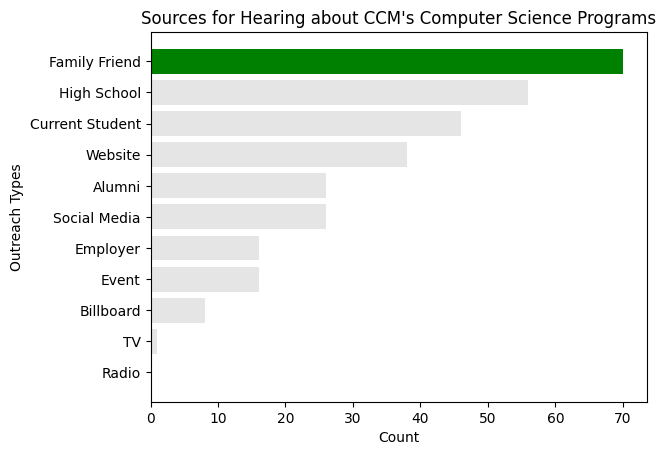

In [508]:
# Create the horizontal bar chart with the data and add the colors attribute.
plt.barh(sorted_columns,sorted_count, color=colors)

# Add a title, x-axis label, and y-axis label to inform us of what the graph is about and what pieces of data are being referenced.
plt.title("Sources for Hearing about CCM's Computer Science Programs")
plt.xlabel("Count")
plt.ylabel("Outreach Types")

By looking at the data, we can see that a lot of the people found out about CCM's Computer Science programs from a Family Friend. Additionally, the top choices include High School, Current Students, the Website, and Alumni. The Department of Information Technologies can use this data to see how most people know about CCM through connections. For this, the Department of Information Technologies can also spread some time trying to improve the available information about their programs on their website, which is the fourth most popular way of hearing about the programs. Additionally, the Department can go ahead and invest in high school promotions, where they can showcase their development and course content to students as a way of engaging them into CCM.

On the other end, this chart also shows that the Radio/TV don't have as much attention from them. The Department of Information Technologies can use this information to maybe not spend as much time using them, but not abandoned them completely as this survey is a sample of students and not all of them.


### **(3) Student Q.** Which factors most motivate students to attend CCM's Computer Science programs?
* For this question, I will need to check out which factors motivated people to attend a CCM Computer Science Program.
* Since I need to reference parts of the data that involve where people heard about the programs, I will need to use all of the columns that had the `motivation` tag I added in Part 2 of this Project. 

In [509]:
# Filter to be the columns that had the motivation tag, as those contain the data related to student motivation for attending a CCM Computer Science program.
columns = df.filter(like='motivation').columns
columns

Index(['motivation_required_class_for_degree', 'motivation_keep_current',
       'motivation_career_advancement', 'motivation_career_change',
       'motivation_professional_dev', 'motivation_job_displacement',
       'motivation_relocation', 'motivation_it_certifications',
       'motivation_financial', 'motivation_personal_enrichment',
       'motivation_curiosity'],
      dtype='object')

Looking at the output, there are 11 different options that this survey asks students if they have been motivated to attend a CCM Computer Science class by. We will be plotting those 11 data columns and showing the corresponding count of students who are motivated by each factor.

I got rid of the other columns that I didn't need for this data analysis. This is any column that didn't have the `motivation_` tag. This is to make it easier for me to see the entire table as the output and only focus on the columns that matter.

In [510]:
# Get rid of columns that are not needed.
motives = df[list(columns)]

motives

,motivation_required_class_for_degree,motivation_keep_current,motivation_career_advancement,motivation_career_change,motivation_professional_dev,motivation_job_displacement,motivation_relocation,motivation_it_certifications,motivation_financial,motivation_personal_enrichment,motivation_curiosity
0,No,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes
1,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No
3,No,Yes,No,No,No,No,No,No,No,No,No
4,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
87,Yes,Yes,Yes,Yes,No,No,No,No,No,No,Yes
88,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes
89,Yes,No,No,No,Yes,No,No,No,No,No,No
90,No,Yes,No,No,No,No,No,No,No,No,Yes


In [511]:
# Finding out the new size of the data frame.
motives.shape

(92, 11)

We created a new dataframe with only the columns that we need. This has now shortened our data table to be from all columns to only include the columns that contained the tag `heard_ccm`.

Now, we need to go through each of the 11 provided motives and count how many students from the survey were motivated by each factor to attend a CCM Computer Science program. I did this by going through the 11 columns that we stored in a list called `columns` and counting how many 'Yes's are present in each column. Then, I appended this value to a new list `count` which will store the count of people that were motived by each factor to attend a CCM Computer Science Program.

In [512]:
# This empty list 'count' will store the count of people who were motivated by each factor to attend a CCM Computer Science course.
count = []

# Going through each column and counting how many people put 'Yes' and appending it to count.
for c in columns:
    count.append((df[c] == 'Yes').sum())

count

[np.int64(82),
 np.int64(70),
 np.int64(54),
 np.int64(18),
 np.int64(65),
 np.int64(21),
 np.int64(9),
 np.int64(3),
 np.int64(20),
 np.int64(48),
 np.int64(47)]

We now have a list of numbers that show how many people are motivated by each factor to attend a CCM Computer Science course.

To keep the column names cleaner and easier to read when graphing, I have went ahead and used the string .replace() function to delete the 'motivation_' tag that were in front of the columns that we needed to reference.

In [513]:
# Replace 'motivation_' with '' to delete them from each column name.
columns = columns.str.replace('motivation_', '', regex=False)
columns

Index(['required_class_for_degree', 'keep_current', 'career_advancement',
       'career_change', 'professional_dev', 'job_displacement', 'relocation',
       'it_certifications', 'financial', 'personal_enrichment', 'curiosity'],
      dtype='object')

I personally find using the names from the columns good for the chart above. However, for others, renaming each one to the full name would be better. I will now rename the columns array to make them look better.

In [514]:
new_names = {
    'required_class_for_degree': 'Required Class for Degree',
    'keep_current': 'Keep Current in Computing Skills',
    'career_advancement': 'Career Advancement',
    'career_change': 'Career Change',
    'professional_dev': 'Professional Development',
    'job_displacement': 'Job Displacement',
    'relocation': 'Relocation',
    'it_certifications': 'IT Certifications',
    'financial': 'Financial',
    'personal_enrichment': 'Personal Enrichment',
    'curiosity': 'Curiosity',
}

# Rename the columns with the dictionary above.
columns = [new_names.get(c, c) for c in columns]
columns

['Required Class for Degree',
 'Keep Current in Computing Skills',
 'Career Advancement',
 'Career Change',
 'Professional Development',
 'Job Displacement',
 'Relocation',
 'IT Certifications',
 'Financial',
 'Personal Enrichment',
 'Curiosity']

When I first ran the code above and graphed it with the graphing code at the bottom, I wasn't appealed to it. I didn't like how it wasn't sorted and how everything was blue. I wanted to make it easier to see so I added a sort and color system to the graph.

I used **ChatGPT** to help me out with the sorting code snippet below.

In [515]:
# Sort indexes by their argument.
sorted_indices = np.argsort(count)
# Sort the count data by the new sorted index array.
sorted_count = np.array(count)[sorted_indices]
# Sort the column name data by the new sorted index array.
sorted_columns = np.array(columns)[sorted_indices]

# OpenAI. ChatGPT. 2024. OpenAI, https://www.openai.com/chatgpt.

I was not able to find how you created the color thing in any of your slideshow materials so I used list comprehensions to make my own version. I did this by finding the highest value in the count list, then, go through the entire list and check if the value is equal to the top value I found earlier. If it is, it would make that color green in the color list and if it is not, it would make it gray.

This would become the `colors` list that we will use for creating our graph to make it colorful and easier for us to see.

In [516]:
# Find the highest count value.
top = np.argsort(sorted_count)[-1:]
# Form a color list with list comprehension and set each color depending on if it is equal to the highest count value.
colors = ['green' if i in top else '#E5E5E5' for i in range(len(count))]

colors

['#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 'green']

To display the data, I used a horizontal bar chart. This is the best choice as it will display each outreach source on the y axis and show the count on the x axis. I thought about doing a vertical bar graph, but I feel like it would look weird and the text labels may crowd in the bottom. This is why I did a horizontal bar chart.

I used the `sorted_columns` for the column data. This is the list of columns with the `motivation_` flag removed and sorted using the algorithm earlier.
I used the `sorted_Count` for the count data. This is the list of counts for each of the columns.

I added color from the `colors` array as well. This show display the top option in green and the others in gray.

I also added a title, x axis label, and y axis label to inform us on what the graph is about and which piece of data is each axis referencing.

Text(0, 0.5, 'Motive')

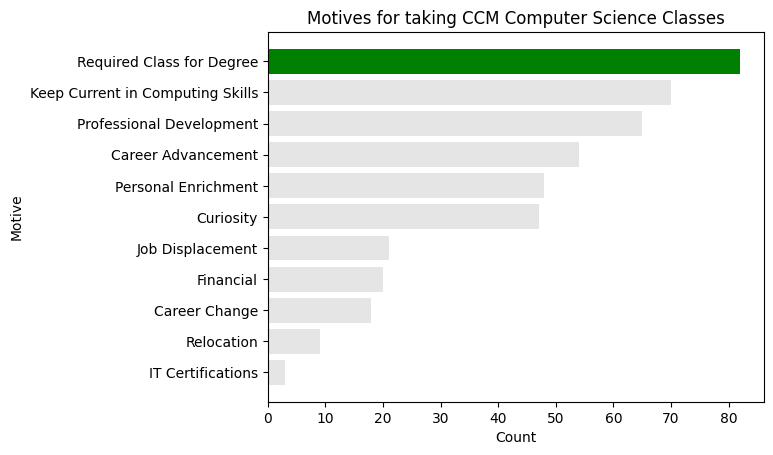

In [517]:
# Create the horizontal bar chart with the data and add the colors attribute.
plt.barh(sorted_columns,sorted_count, color=colors)

# Add a title, x-axis label, and y-axis label to inform us of what the graph is about and what pieces of data are being referenced.
plt.title("Motives for taking CCM Computer Science Classes")
plt.xlabel("Count")
plt.ylabel("Motive")

In this chart, we can see that a large portion of the motives were that these classes were required for the degree. This makes me very interested in knowing how many said that it was required, so I will be checking them below to see.

In [518]:
# Find the total amount of responses.
motives.shape

(92, 11)

In [519]:
# Find the amount that said that this class was required for their degree.
(df["motivation_required_class_for_degree"] == 'Yes').sum()

np.int64(82)

This is a surprising amount, 82/92 of the total students needed the computing class they were in for their degree. I knew that this was going to be high, but I didn't think it would be a large chunk of the responders.

Apart from needing these classes for their degree, the top options include students who want to be current in computing skills, professional development, career advancement, and personal enrichment. The Department of Information Technologies can use this information in order to figure out how to best tailor their courses to be more helpful for students by understanding their motives for enrolling in courses in the department. Additionally, if we take that most students needed these courses for their degree, maybe the Department of Information Technologies could figure out how to incorporate more computrer science courses in other degrees, which may allow students to be able to be more involved with technology while in other degrees and increase enrollment. 

On the other edge, we can see that IT Certificiations are at the bottom, which are tell the Department of Information Technologies two different things: this shows that they are not having any IT certifications for classes and therefore should try to prioritize different ways to implement IT certifications for different careers of students that may need them, which can increase enrollment; this shows that IT certifications are not on many students minds and maybe don't necessary appeal to them, so we shouldn't focus on them as much and dedicate some of the resources for IT Certifications to other programs that may interest students. This decision process would have to be supported by other pieces of data that the chairperson may have available, but this data may hint that this is something that the chairperson would need to take into account for the future to boost enrollment.

### **(4) Student Q.** Which previous computing experiences have had the highest impact for students to enroll?
* For this question, I will need to check which activities had the highest impact for student enrollment.
* Since I need to reference parts of the data that involve where people heard about the programs, I will need to use all of the columns that had the `extent_impact` tag I added in Part 2 of this Project. 

In [520]:
# Filter to be the columns that had the extent_impact tag, as those contain the data related to the previous experiences a student had experienced and how that impacted student enrollment.
columns = df.filter(like='extent_impact').columns
columns

Index(['extent_impact_hs_computing_class', 'extent_impact_hs_computing_club',
       'extent_impact_computing_competitions',
       'extent_impact_afterschool_computing_camp',
       'extent_impact_summer_computing_camp',
       'extent_impact_ap_computing_class',
       'extent_impact_dual_enrollment_computing_class',
       'extent_impact_family_or_friend_influence',
       'extent_impact_family_working_in_computing',
       'extent_impact_hs_teacher_guidance',
       'extent_impact_employer_influence'],
      dtype='object')

Looking at the output, there are 11 different options that this survey asks students if the previous activity has impacted their enrollment decision. We will be plotting those 11 data columns and showing the corresponding count of students who are impacted by each experience.

I got rid of the other columns that I didn't need for this data analysis. This is any column that didn't have the `extent_impact_` tag. This is to make it easier for me to see the entire table as the output and only focus on the columns that matter.

In [521]:
# Get rid of columns that are not needed.
extent_impacts = df[list(columns)]

extent_impacts

,extent_impact_hs_computing_class,extent_impact_hs_computing_club,extent_impact_computing_competitions,extent_impact_afterschool_computing_camp,extent_impact_summer_computing_camp,extent_impact_ap_computing_class,extent_impact_dual_enrollment_computing_class,extent_impact_family_or_friend_influence,extent_impact_family_working_in_computing,extent_impact_hs_teacher_guidance,extent_impact_employer_influence
0,No Impact,No Impact,High Impact,NaN,NaN,NaN,NaN,Some Impact,NaN,High Impact,NaN
1,Some Impact,Some Impact,Some Impact,Some Impact,Some Impact,Some Impact,Some Impact,Some Impact,Some Impact,Some Impact,Some Impact
2,NaN,NaN,No Impact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact
4,Some Impact,No Impact,NaN,NaN,NaN,NaN,NaN,Some Impact,NaN,NaN,Some Impact
...,...,...,...,...,...,...,...,...,...,...,...
87,Some Impact,Some Impact,No Impact,No Impact,Some Impact,Some Impact,High Impact,Some Impact,Some Impact,High Impact,No Impact
88,No Impact,Some Impact,No Impact,No Impact,No Impact,No Impact,No Impact,Some Impact,Some Impact,Some Impact,Some Impact
89,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact,No Impact
90,High Impact,Some Impact,Some Impact,No Impact,No Impact,No Impact,No Impact,Some Impact,No Impact,No Impact,No Impact


# Finding out the new size of the data frame.
extent_impacts.shape

We created a new dataframe with only the columns that we need. This has now shortened our data table to be from all columns to only include the columns that contained the tag `extent_impact`.

Now, we need to go through each of the 11 provided activities and count how many students from the survey were highly impacted by them to attend a CCM Computer Science program. I did this by going through the 11 columns that we stored in a list called `columns` and counting how many 'High Impact's are present in each column. Then, I appended this value to a new list `count` which will store the count of people that were impacted by each activity to attend a CCM Computer Science Program.

In [522]:
# This empty list 'count' will store the count of people who were impacted by each activity to attend a CCM Computer Science course.
count = []

# Going through each column and counting how many people put 'High Impact' and appending it to count.
for c in columns:
    count.append((df[c] == 'High Impact').sum())

count

[np.int64(8),
 np.int64(2),
 np.int64(5),
 np.int64(3),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(12),
 np.int64(6),
 np.int64(6),
 np.int64(10)]

We now have a list of numbers that show how many people are impacted by each previous activity to attend a CCM Computer Science course.

To keep the column names cleaner and easier to read when graphing, I have went ahead and used the string .replace() function to delete the 'extent_impact_' tag that were in front of the columns that we needed to reference.

In [523]:
# Replace 'extent_impact_' with '' to delete them from each column name.
columns = columns.str.replace('extent_impact_', '', regex=False)
columns

Index(['hs_computing_class', 'hs_computing_club', 'computing_competitions',
       'afterschool_computing_camp', 'summer_computing_camp',
       'ap_computing_class', 'dual_enrollment_computing_class',
       'family_or_friend_influence', 'family_working_in_computing',
       'hs_teacher_guidance', 'employer_influence'],
      dtype='object')

I personally find using the names from the columns good for the chart above. However, for others, renaming each one to the full name would be better. I will now rename the columns array to make them look better.

In [524]:
new_names = {
    'hs_computing_class': 'High School Computing Class',
    'hs_computing_club': 'High School Computing Club',
    'computing_competitions': 'Computing Competitions',
    'afterschool_computing_camp': 'After School Computing Camp',
    'summer_computing_camp': 'Summer Computing Camp',
    'ap_computing_class': 'AP Computing Class',
    'dual_enrollment_computing_class': 'Dual Enrollment Computing Class',
    'family_or_friend_influence': 'Family or Friend Influence',
    'family_working_in_computing': 'Family Working in Computing',
    'hs_teacher_guidance': 'High School Teacher or Counselor',
    'employer_influence': 'Employer Influence',
}

# Rename the columns with the dictionary above.
columns = [new_names.get(c, c) for c in columns]
columns

['High School Computing Class',
 'High School Computing Club',
 'Computing Competitions',
 'After School Computing Camp',
 'Summer Computing Camp',
 'AP Computing Class',
 'Dual Enrollment Computing Class',
 'Family or Friend Influence',
 'Family Working in Computing',
 'High School Teacher or Counselor',
 'Employer Influence']

When I first ran the code above and graphed it with the graphing code at the bottom, I wasn't appealed to it. I didn't like how it wasn't sorted and how everything was blue. I wanted to make it easier to see so I added a sort and color system to the graph.

I used **ChatGPT** to help me out with the sorting code snippet below.

In [525]:
# Sort indexes by their argument.
sorted_indices = np.argsort(count)
# Sort the count data by the new sorted index array.
sorted_count = np.array(count)[sorted_indices]
# Sort the column name data by the new sorted index array.
sorted_columns = np.array(columns)[sorted_indices]

# OpenAI. ChatGPT. 2024. OpenAI, https://www.openai.com/chatgpt.

I was not able to find how you created the color thing in any of your slideshow materials so I used list comprehensions to make my own version. I did this by finding the highest value in the count list, then, go through the entire list and check if the value is equal to the top value I found earlier. If it is, it would make that color green in the color list and if it is not, it would make it gray.

This would become the `colors` list that we will use for creating our graph to make it colorful and easier for us to see.

In [526]:
# Find the highest count value.
top = np.argsort(sorted_count)[-1:]
# Form a color list with list comprehension and set each color depending on if it is equal to the highest count value.
colors = ['green' if i in top else '#E5E5E5' for i in range(len(count))]

colors

['#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 'green']

To display the data, I used a horizontal bar chart. This is the best choice as it will display each activity on the y axis and show the count on the x axis. I thought about doing a vertical bar graph, but I feel like it would look weird and the text labels may crowd in the bottom. This is why I did a horizontal bar chart.

I used the `sorted_columns` for the column data. This is the list of columns with the `extent_impact_` flag removed and sorted using the algorithm earlier.
I used the `sorted_Count` for the count data. This is the list of counts for each of the columns.

I added color from the `colors` array as well. This show display the top option in green and the others in gray.

I also added a title, x axis label, and y axis label to inform us on what the graph is about and which piece of data is each axis referencing.

Text(0, 0.5, 'Previous Computing Activity')

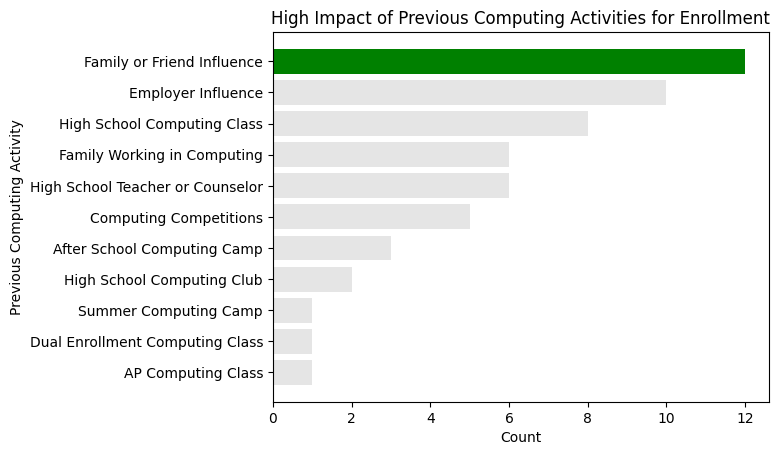

In [527]:
# Create the horizontal bar chart with the data and add the colors attribute.
plt.barh(sorted_columns,sorted_count, color=colors)

# Add a title, x-axis label, and y-axis label to inform us of what the graph is about and what pieces of data are being referenced.
plt.title("High Impact of Previous Computing Activities for Enrollment")
plt.xlabel("Count")
plt.ylabel("Previous Computing Activity")

In this chart, we can confirm our data displayed in the chart from question #2, where we see family and friend influence at the very top. Also at the top are those that involve word of mouth communication, such as employers and high school teachers. We also see how high school computing classes are the third top option and family members working in computing are the fourth top option. The Department of Information Technologies can use this information in order to, for example, partner up with high schools to create a day's worth of interactive, college-level curriculum that can gets students interested in computer science programs. There are many different ways the chairperson can use this data, but it all goes to show that a lot of the college's enrollment is influenced by the community spreading word out to others. Nevertheless, the department can still use the other information, like I said with High School Computing Class, to take advantage of those who were influenced by High School curriculum.

However, this graph only shows 'High Impact', which may not be accurate to fully answer this question. I would also like to confirm this by checking out the 'Some Impact' as its own graph and then a final graph combining both impacts to see if there is a trend between them.

Text(0, 0.5, 'Previous Computing Activity')

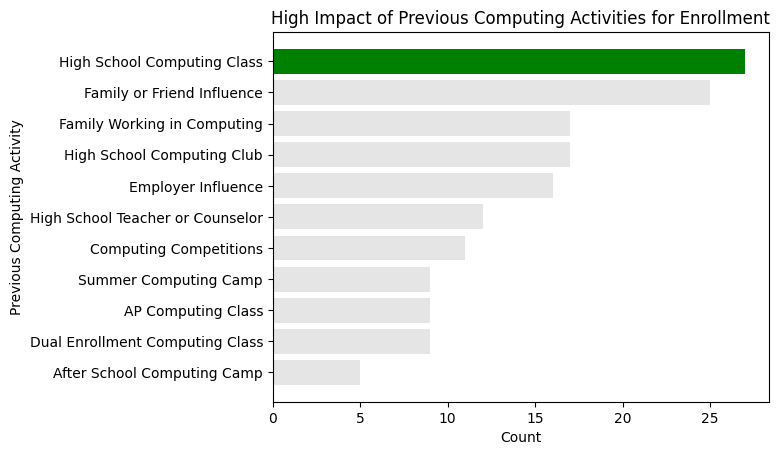

In [528]:
# Filter to be the columns that had the extent_impact tag, as those contain the data related to the previous experiences a student had experienced and how that impacted student enrollment.
columns = df.filter(like='extent_impact').columns
columns

# Get rid of columns that are not needed.
extent_impacts = df[list(columns)]

extent_impacts

# This empty list 'count' will store the count of people who were impacted by each activity to attend a CCM Computer Science course.
count = []

# Going through each column and counting how many people put 'High Impact' and appending it to count.
for c in columns:
    count.append((df[c] == 'Some Impact').sum())

count

# Replace 'extent_impact_' with '' to delete them from each column name.
columns = columns.str.replace('extent_impact_', '', regex=False)
columns

new_names = {
    'hs_computing_class': 'High School Computing Class',
    'hs_computing_club': 'High School Computing Club',
    'computing_competitions': 'Computing Competitions',
    'afterschool_computing_camp': 'After School Computing Camp',
    'summer_computing_camp': 'Summer Computing Camp',
    'ap_computing_class': 'AP Computing Class',
    'dual_enrollment_computing_class': 'Dual Enrollment Computing Class',
    'family_or_friend_influence': 'Family or Friend Influence',
    'family_working_in_computing': 'Family Working in Computing',
    'hs_teacher_guidance': 'High School Teacher or Counselor',
    'employer_influence': 'Employer Influence',
}

# Rename the columns with the dictionary above.
columns = [new_names.get(c, c) for c in columns]
columns

# Sort indexes by their argument.
sorted_indices = np.argsort(count)
# Sort the count data by the new sorted index array.
sorted_count = np.array(count)[sorted_indices]
# Sort the column name data by the new sorted index array.
sorted_columns = np.array(columns)[sorted_indices]

# OpenAI. ChatGPT. 2024. OpenAI, https://www.openai.com/chatgpt.

# Find the highest count value.
top = np.argsort(sorted_count)[-1:]
# Form a color list with list comprehension and set each color depending on if it is equal to the highest count value.
colors = ['green' if i in top else '#E5E5E5' for i in range(len(count))]

colors

# Create the horizontal bar chart with the data and add the colors attribute.
plt.barh(sorted_columns,sorted_count, color=colors)

# Add a title, x-axis label, and y-axis label to inform us of what the graph is about and what pieces of data are being referenced.
plt.title("High Impact of Previous Computing Activities for Enrollment")
plt.xlabel("Count")
plt.ylabel("Previous Computing Activity")

This graph, with just the 'Some Impact' confirms the 'High Impact' graph by showcasing how influence from the community like family, friends, employers, and teachers have a big impact on a student's decision to attend a Computer Science program at CCM. I will now combine the data from this chart and the previous chart so we can see a combined chart of these activities and the total count that have had some impact and high impact.

Text(0, 0.5, 'Previous Computing Activity')

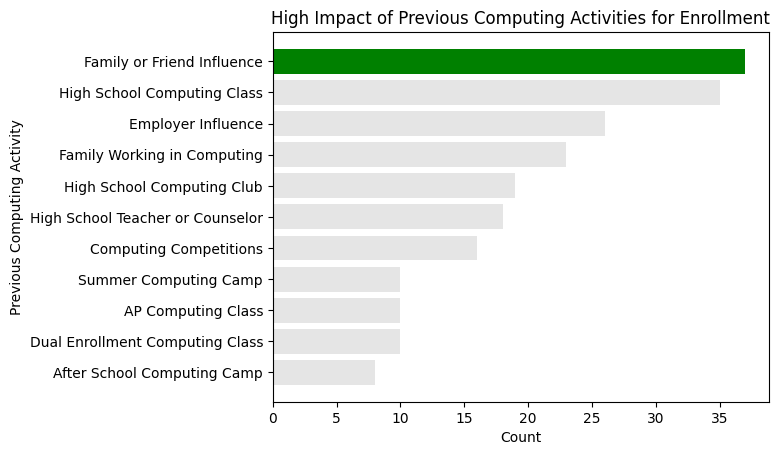

In [529]:
# Filter to be the columns that had the extent_impact tag, as those contain the data related to the previous experiences a student had experienced and how that impacted student enrollment.
columns = df.filter(like='extent_impact').columns
columns

# Get rid of columns that are not needed.
extent_impacts = df[list(columns)]

extent_impacts

# This empty list 'count' will store the count of people who were impacted by each activity to attend a CCM Computer Science course.
count = []

# Going through each column and counting how many people put 'High Impact' and appending it to count.
for c in columns:
    count.append((df[c] == 'High Impact').sum() + (df[c] == 'Some Impact').sum())

count

# Replace 'extent_impact_' with '' to delete them from each column name.
columns = columns.str.replace('extent_impact_', '', regex=False)
columns

new_names = {
    'hs_computing_class': 'High School Computing Class',
    'hs_computing_club': 'High School Computing Club',
    'computing_competitions': 'Computing Competitions',
    'afterschool_computing_camp': 'After School Computing Camp',
    'summer_computing_camp': 'Summer Computing Camp',
    'ap_computing_class': 'AP Computing Class',
    'dual_enrollment_computing_class': 'Dual Enrollment Computing Class',
    'family_or_friend_influence': 'Family or Friend Influence',
    'family_working_in_computing': 'Family Working in Computing',
    'hs_teacher_guidance': 'High School Teacher or Counselor',
    'employer_influence': 'Employer Influence',
}

# Rename the columns with the dictionary above.
columns = [new_names.get(c, c) for c in columns]
columns

# Sort indexes by their argument.
sorted_indices = np.argsort(count)
# Sort the count data by the new sorted index array.
sorted_count = np.array(count)[sorted_indices]
# Sort the column name data by the new sorted index array.
sorted_columns = np.array(columns)[sorted_indices]

# OpenAI. ChatGPT. 2024. OpenAI, https://www.openai.com/chatgpt.

# Find the highest count value.
top = np.argsort(sorted_count)[-1:]
# Form a color list with list comprehension and set each color depending on if it is equal to the highest count value.
colors = ['green' if i in top else '#E5E5E5' for i in range(len(count))]

colors

# Create the horizontal bar chart with the data and add the colors attribute.
plt.barh(sorted_columns,sorted_count, color=colors)

# Add a title, x-axis label, and y-axis label to inform us of what the graph is about and what pieces of data are being referenced.
plt.title("High Impact of Previous Computing Activities for Enrollment")
plt.xlabel("Count")
plt.ylabel("Previous Computing Activity")

This chart, like the others, are once again very similar to them, meaning that the original hypothesis from the 'High Impact' chart, is confirmed by these other charts that involve other pieces of data. Although it was very likely to be similar, it is important that we check just to confirm our ideas and take into account other data asked by the questions.